BoundedIntText(value=8, description='Num colors:', min=1)

Button(description='Generate', style=ButtonStyle())

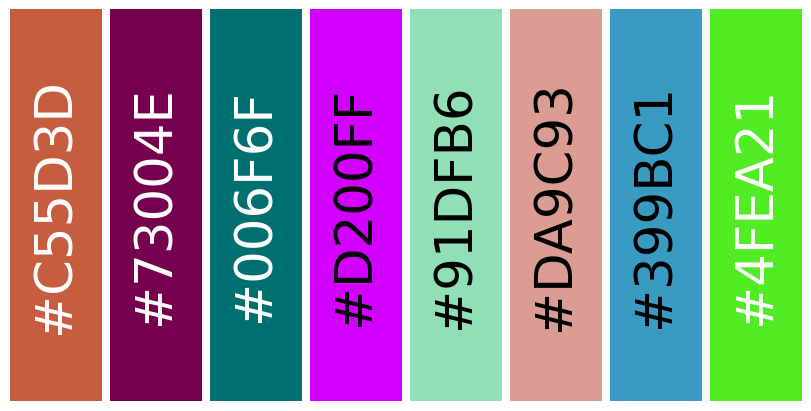

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import ipywidgets as widgets
from IPython.display import clear_output


def normalize(c):
    return c / np.linalg.norm(c)

def normalize_basis(basis):
    b = basis[:]
    b[0] = normalize(b[0])
    b[1] = normalize(b[1])
    b[2] = normalize(b[2])
    return b

def generate_random_color_pallete(num_colors):
    first_color = normalize(np.random.uniform(-1, 1, size=3))
    second_color = np.random.uniform(-1, 1, size=3)
    third_color = normalize(np.cross(first_color, second_color))
    second_color = np.cross(third_color, first_color)

    b = [first_color, second_color, third_color]
    
    basises = np.array([[b[0], b[1], b[2]],
               [-b[0], b[1], b[2]],
               [-b[0], -b[1], b[2]],
               [-b[0], b[1], -b[2]],
               [b[0], -b[1], -b[2]],
               [b[0], b[1], -b[2]],
               [-b[0], -b[1], -b[2]],
               [b[0], -b[1], b[2]]])
               
    colors = []
    basis_idx = 0
    for i in range(num_colors):
        shuffling = np.random.uniform(0.3, 1, 3)
        basis = basises[basis_idx % 8]
        color = np.sum(basis * shuffling, axis=0)
        color = np.clip(color * 0.5 + 0.5, 0, 1)
        colors += [color]
        basis_idx += 1
    return colors

def generate_and_draw_pallete(num_colors):
    ax = plt.figure(layout="constrained", figsize=[num_colors, 4]).subplots(1, num_colors)
    if num_colors == 1:
        ax = [ax]
    for i, col in zip(range(num_colors), generate_random_color_pallete(num_colors)):
        ax[i].add_patch(Rectangle((0, 0), 1, 1, facecolor=col))

        ax[i].set_xlim(0, 1)
        ax[i].set_ylim(0, 1)
        ax[i].axis('off')

        color_3bytes = (col*255).astype(np.int32)
        text_color = 'white' if np.linalg.norm(col) < np.linalg.norm(1 - col) else 'black'
        text = '#%02X%02X%02X' % (color_3bytes[0], color_3bytes[1], color_3bytes[2])
        ax[i].text(
            0.5, 
            0.5, 
            text, 
            rotation='vertical', 
            color=text_color, 
            fontsize=ax[i].bbox.height*0.12,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax[i].transAxes)
    plt.show()


num_colors_w = widgets.BoundedIntText(
    value=8,
    min=1,
    max=100,
    step=1,
    description='Num colors:',
    disabled=False
)
generate_w = widgets.Button(description="Generate")

def on_generate_click(_):
    clear_output()
    display(num_colors_w, generate_w)
    num_colors = num_colors_w.value
    generate_and_draw_pallete(num_colors)

generate_w.on_click(on_generate_click)
display(num_colors_w, generate_w)
